In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature


import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature
from scipy.stats import pearsonr

In [2]:
path = '/home/cshu2/clim680/'
fname = 'newPM_202201.nc'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:  (day: 31, time: 24, lat: 351, lon: 801)
Coordinates:
  * day      (day) int32 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lat      (lat) float32 15.0 15.1 15.2 15.3 15.4 ... 49.6 49.7 49.8 49.9 50.0
  * lon      (lon) float32 -130.0 -129.9 -129.8 -129.7 ... -50.2 -50.1 -50.0
Data variables:
    PM10     (day, time, lat, lon) float32 ...
    PM25     (day, time, lat, lon) float32 ...

In [3]:
ds_climo = ds.groupby('time').mean('day')
ds_climo

<xarray.Dataset>
Dimensions:  (time: 24, lat: 351, lon: 801)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lat      (lat) float32 15.0 15.1 15.2 15.3 15.4 ... 49.6 49.7 49.8 49.9 50.0
  * lon      (lon) float32 -130.0 -129.9 -129.8 -129.7 ... -50.2 -50.1 -50.0
Data variables:
    PM10     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    PM25     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [4]:
R = np.corrcoef(ds_climo['PM10'][:,0,0],ds_climo['PM25'][:,0,0])
R

array([[nan, nan],
       [nan, nan]])

In [5]:
nx=len(ds['lon'])
ny=len(ds['lat'])

p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))

t_start = time.perf_counter()
for i in range(nx):
    for j in range(ny):
        r = np.corrcoef(ds_climo['PM10'][:,j,i],ds_climo['PM25'][:,j,i])[0,1]
        r_array[j,i] = r
#r_array.shape
print(f"{time.perf_counter()-t_start:0.2f} s")

124.85 s


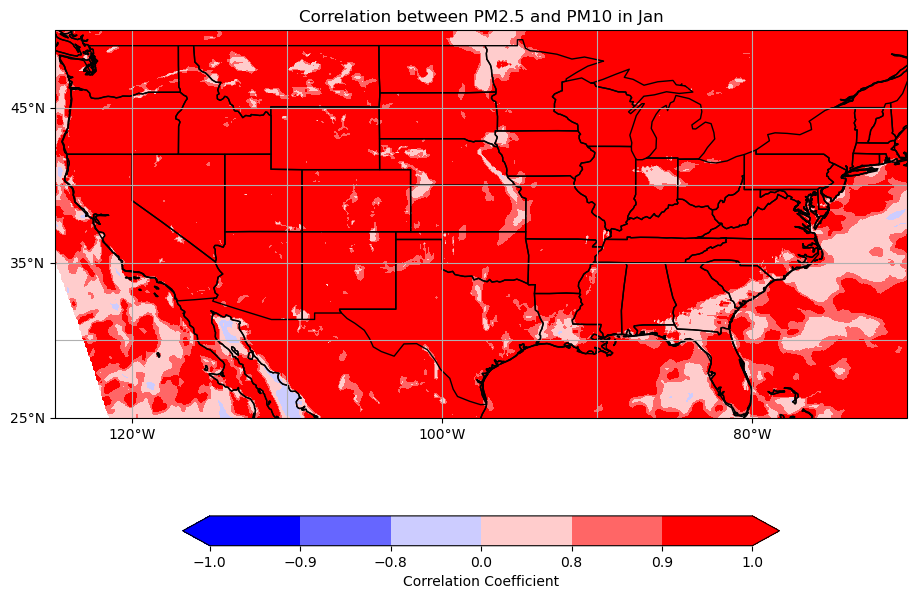

In [9]:
import matplotlib
import cartopy.feature as cfeature

#clevs=np.arange(-1,1.1,0.1)
clevs = [-1,-0.9,-0.8,0,0.8,0.9,1.0]
colorslist = ['blue','white','red']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list('123',colorslist,N=6)
norm = matplotlib.colors.BoundaryNorm(clevs,len(clevs))

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())


# Make a filled contour plot
cs=ax.contourf(
            ds['lon'], ds['lat'],r_array,
            clevs,
            cmap = colormap,
            norm = norm,
            transform=ccrs.PlateCarree(),
            extend='both'
            )

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Choose lat/lon ranges
ax.set_extent([-125,-70,25,50],crs=ccrs.PlateCarree())

# Add coastlines and stateslines
ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale('110m'))

# Define the xticks for longitude
ax.set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between PM2.5 and PM10 in Jan') ;